In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
# Load the dataset
df = pd.read_csv("winequality-red.csv")  # Or the correct file path if different
print("Successful")

Successful


In [4]:
# Data Preparation 

#View first 5 rows
print(df.head())

# Dataset shape
print("\nShape:", df.shape)

# Info about datatypes and non-null values
print("\nInfo:")
print(df.info())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary stats:\n", df.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [5]:
#Exploratory Data Analysis
#Class Distribution
print("Wine Quality Distribution:\n")
print(df['quality'].value_counts().sort_index())


Wine Quality Distribution:

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


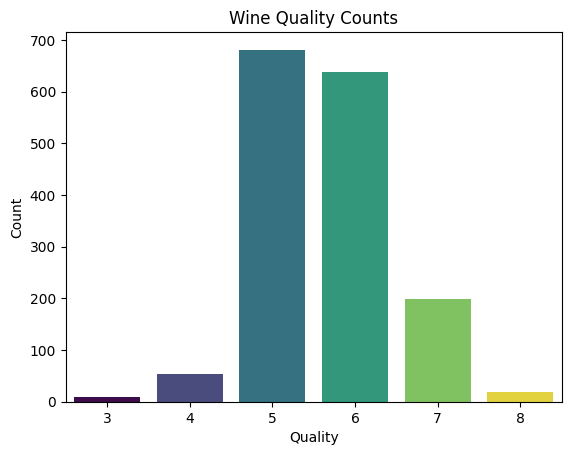

In [9]:
#Plotting Wine quality distribution
sns.countplot(x='quality',hue='quality', data=df, palette='viridis',legend=False)
plt.title("Wine Quality Counts")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()


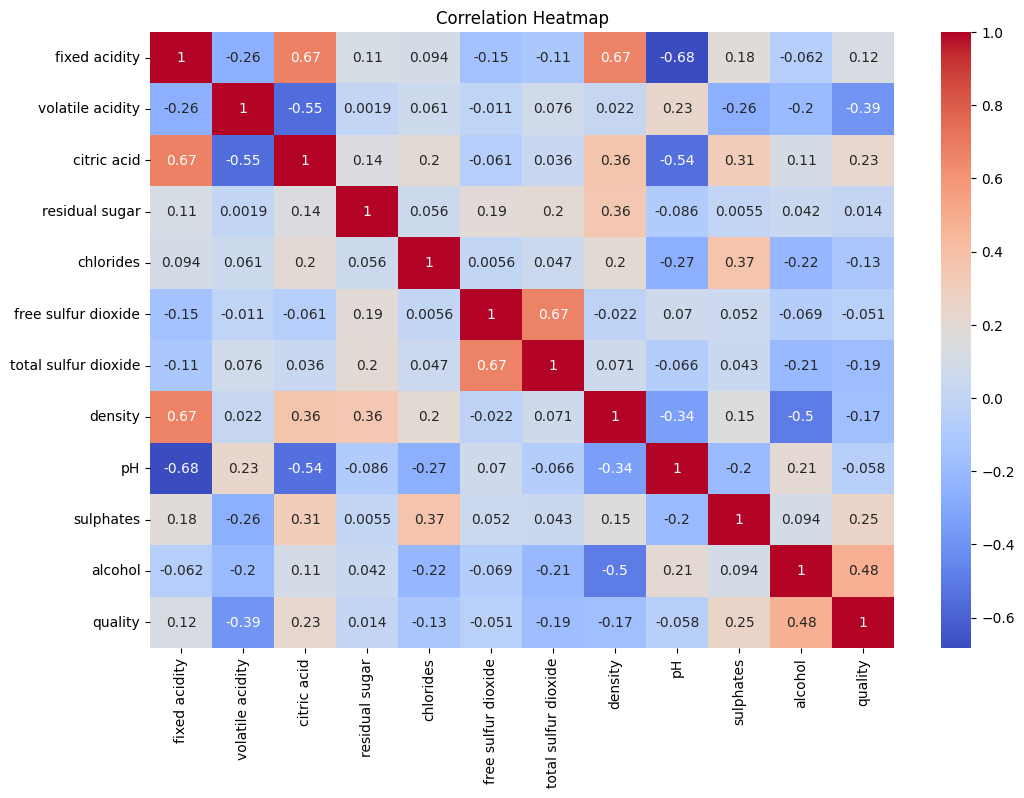

In [10]:
#Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


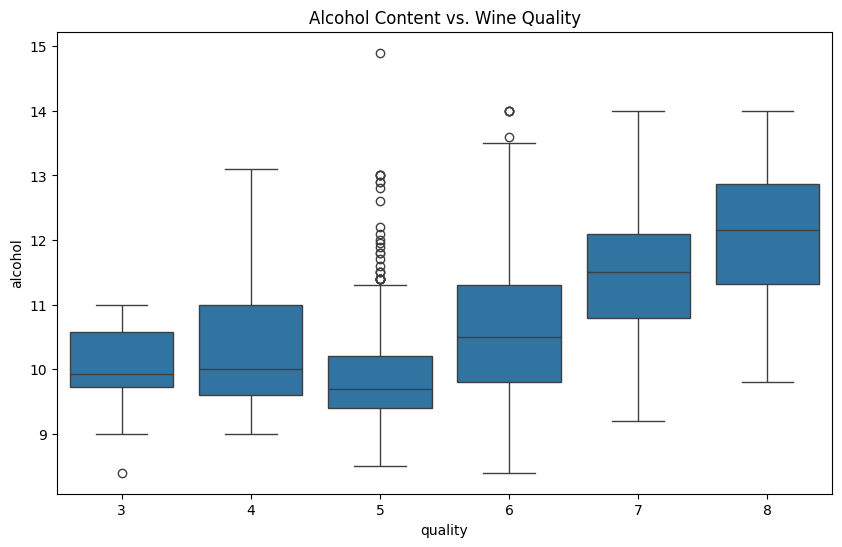

In [11]:
#Boxplot – Feature distribution vs. quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Alcohol Content vs. Wine Quality")
plt.show()


In [21]:
#Model Building
# Features (all columns except 'quality')
X = df.drop('quality', axis=1)

# Target (wine quality)
y = df['quality']

#Train-Test-Split
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardization

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [26]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Logistic Regression Predictions
y_pred_lr = lr_model.predict(X_test)

#Evaluation
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

🔹 Logistic Regression
Accuracy: 0.575
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  1  7  2  0  0]
 [ 0  0 98 32  0  0]
 [ 0  0 46 76 10  0]
 [ 0  0  3 30  9  0]
 [ 0  0  0  1  4  0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.54      0.58      0.56       132
           7       0.39      0.21      0.28        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.43      0.27      0.28       320
weighted avg       0.56      0.57      0.55       320



C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [27]:
#Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)

#Evaluation
print("\n🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



🔹 Random Forest
Accuracy: 0.678125
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 98 31  1  0]
 [ 0  0 27 98  7  0]
 [ 0  0  0 20 21  1]
 [ 0  0  0  0  5  0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.74      0.75      0.75       130
           6       0.64      0.74      0.69       132
           7       0.62      0.50      0.55        42
           8       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.65      0.68      0.66       320



C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [28]:
# def predict_wine_quality_user_input():
    print("🍷 Enter wine characteristics below 👇")
    
    # Getting input for all 11 features
    fixed_acidity = float(input("Fixed Acidity: "))
    volatile_acidity = float(input("Volatile Acidity: "))
    citric_acid = float(input("Citric Acid: "))
    residual_sugar = float(input("Residual Sugar: "))
    chlorides = float(input("Chlorides: "))
    free_sulfur_dioxide = float(input("Free Sulfur Dioxide: "))
    total_sulfur_dioxide = float(input("Total Sulfur Dioxide: "))
    density = float(input("Density: "))
    pH = float(input("pH: "))
    sulphates = float(input("Sulphates: "))
    alcohol = float(input("Alcohol: "))

    # Create the input array
    input_data = [[
        fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
        chlorides, free_sulfur_dioxide, total_sulfur_dioxide,
        density, pH, sulphates, alcohol
    ]]

    # Make prediction
    prediction = rf_model.predict(input_data)

    print("\n🔍 Prediction:")
    print("Wine Quality:", prediction[0])

# Call the function
predict_wine_quality_user_input()


🍷 Enter wine characteristics below 👇


Fixed Acidity:  7.4
Volatile Acidity:  0.7
Citric Acid:  0
Residual Sugar:  1.9
Chlorides:  0.076
Free Sulfur Dioxide:  11
Total Sulfur Dioxide:  34
Density:  0.9978
pH:  3.51
Sulphates:  0.56
Alcohol:  9.4



🔍 Prediction:
Wine Quality: 5
